In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/bmi_data.csv')
df.head(10)

,Age,Height(Inches),Weight(Pounds),BMI
0,21,65.78331,112.9925,18.357646
1,35,71.51521,136.4873,18.762652
2,27,69.39874,153.0269,22.338985
3,24,68.21660,142.3354,21.504612
4,18,67.78781,144.2971,22.077669
5,22,68.69784,123.3024,18.368944
6,19,70.01472,136.4623,19.571891
7,28,67.90265,112.3723,17.135021
8,25,66.78236,120.6672,19.022366
9,28,67.62333,114.1430,17.549106


In [ ]:
X = df.drop('BMI', axis='columns')
y = df['BMI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsRegressor(n_neighbors=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([16.3399997 , 22.05849463, 17.98042349, ..., 21.57862298,
       19.81277963, 18.8265399 ])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.026081350410785416


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.16149721487005717


In [ ]:
from sklearn.metrics import r2_score
# assuming y_test and y_pred are your true and predicted target values
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.989629848667001


In [ ]:
def adj_r_squared(y_test, y_pred, n, k):
    # Calculate R-squared
    ssr = np.sum((y_test - y_pred)**2)
    sst = np.sum((y_test - np.mean(y_pred))**2)
    r_squared = 1 - (ssr / sst)
    adj_r_squared = 1 - (((1 - r_squared**2) * (n - 1)) / (n - k - 1))
    return adj_r_squared
n = 24950 # the sample size (n)
k = 3  # number of independent variables (k)
adj_r_squared = adj_r_squared(y_test, y_pred, n, k)
adj_r_squared

0.9793648325185839

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.11263511307815628


In [ ]:
X = np.array([[21, 65.78331, 112.9925]])

y_pred_par1 = model.predict(X)

y_pred_par1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([18.35764628])

Text(0, 0.5, 'Predicted values')

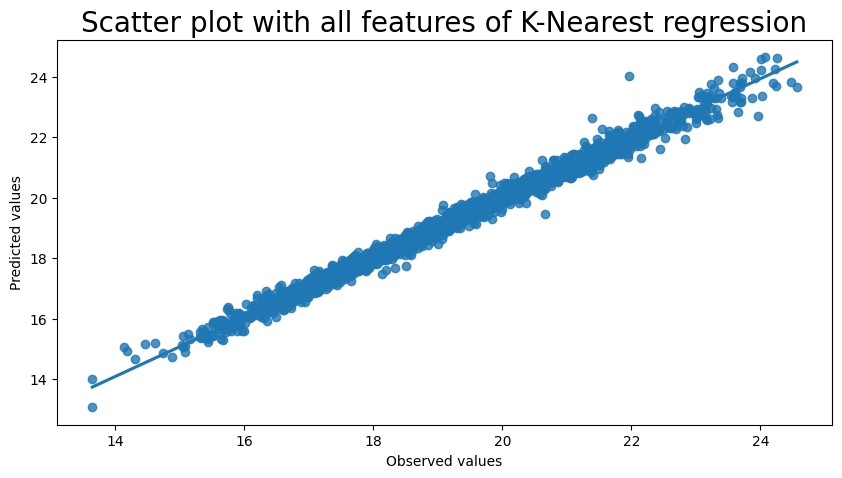

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Scatter plot with all features of K-Nearest regression', fontsize = 20)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')


**PREDICT DATA COLLECTION**



In [ ]:
# Preprocess the new dataset
X_new = new_data[['Height (inches)', 'Weight (pounds)', 'Age']].values
X_new_scaled = scaler.transform(X_new)

# Make predictions
predictions_new = model.predict(X_new_scaled)

# Print the predictions
for i in range(len(X_new_scaled)):
    print(i, 'Predicted BMI:', predictions_new[i])